In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class LogisticRegresion():
    def __init__(self,alpha = 0.05,itera = 1000):
        """alpha:学习率
           itera:迭代次数
           result:初始值是0,用于保存预测的结果
           theta:要训练的参数"""
        self.alpha = alpha
        self.itera = itera
        self.result = 0
        self.theta = 0
        
    def sigmoid(self,X):
        return 1/(1 + np.exp(-X))
    
    def init_input(self,X):
        X = np.c_[np.ones((X.shape[ 0 ],1)),X]
        theta = np.zeros((X.shape[ 1 ],1))
        return theta,X
    
    def fit(self,X,y):
        theta,X = self.init_input(X)
        m = X.shape[ 0 ]
        y = y.reshape(m,1)
        for i in range(self.itera):
            sigmoid = self.sigmoid(X.dot(theta))
            error = y - sigmoid
            theta += (self.alpha)*(np.dot(X.T,error))
        self.theta = theta
        
    def predict(self,X,threshold = 0.5):
        """threshold:默认阈值是0.5,即大雨0.5就是正类,反之就是负类"""
        X = self.init_input(X)[ 1 ]
        theta = self.theta
        sigmoid = self.sigmoid(X.dot(theta))
        result = np.where(sigmoid>threshold,1,0)#改阈值可以提高分辨程度
        self.result = result
        return result.T
    
    def accury(self,y):
        y = y.reshape(len(y),1)
        accury = np.where(y==self.result,1,0)
        accury = np.sum(accury)/len(y)
        return accury
    

In [4]:
data=pd.read_csv(r'~/Binary-classification-dataset-master/data0/data.csv',
                names = ['label','x1', 'x2'])

In [5]:
data.head()

,label,x1,x2
0,1.0,2.6487,4.5192
1,1.0,1.5438,2.4443
2,1.0,1.8990,4.2409
3,1.0,2.4711,5.8097
4,1.0,3.3590,6.4423


In [5]:
X1 = data[data['label'] == 1]
X1 = X1[["x1","x2"]]
X2 = data[ data['label'] != 1 ]
X2 = X2[["x1","x2"]]

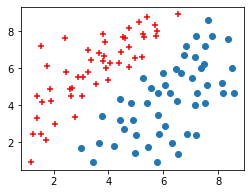

In [6]:
fig, ax = plt.subplots(figsize = (4,3))
ax.scatter(X1['x1'],X1['x2'],marker = "+",color = 'red')
ax.scatter(X2['x1'],X2['x2'],marker = "o")

In [7]:
X = data[["x1","x2"]].values
y = data['label'].values
y = np.where(y < 0,0,y)

In [8]:
logic = LogisticRegresion(alpha = 0.01,itera = 500)

In [9]:
logic.fit(X,y)

In [10]:
logic.predict(X)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [11]:
logic.accury(y)

1.0

In [12]:
def sigmoid(x1,x2):
    """定义等高线图的对应关系"""
    theta = logic.theta
    return 1/(1+np.exp(theta[0]+theta[1]*x1+theta[2]*x2))

In [13]:
x1=np.linspace(0,9,100)
x2=np.linspace(0,9,100)
Z1,Z2=np.meshgrid(x1,x2)

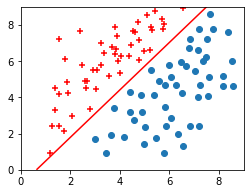

In [14]:
fig, ax = plt.subplots( figsize=(4,3))
ax.contour(Z1,Z2,sigmoid(Z1,Z2),[0.5],colors='r')
ax.scatter(X1['x1'],X1['x2'],marker="+",color = 'red')
ax.scatter(X2['x1'],X2['x2'],marker="o")